In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [43]:
def import_data(norm=True, interaction=False):
    import pandas as pd
    age = pd.read_csv('age_by_geo.tsv', index_col=0, header=None)
    inc = pd.read_csv('inc_by_geo.tsv', index_col=0, header=None)
    edu = pd.read_csv('edu_by_geo.tsv', index_col=0, header=None)
    hea = pd.read_csv('health_by_geo.tsv', index_col=0, header=None)
    dep = pd.read_csv('dep_by_geo.tsv', index_col=0, header=None)
    wbg = pd.read_csv('wellbeing_by_geo.tsv', index_col=0, sep='\t')
    
    ent = pd.read_csv('ent_uk.tsv', index_col=0, sep='\t')
    sas = pd.read_csv('sas_meanvar_both_uk.tsv', index_col=0, sep='\t')
    sas_stat = pd.read_csv('sas_static_uk.tsv', index_col=0, sep='\t')
    eig = pd.read_csv('eig_rw_uk.tsv', index_col=0, sep='\t')
    bwc = pd.read_csv('bwc_rw_uk.tsv', index_col=0, sep='\t')
    bwc_age = pd.read_csv('bwc_age_rw_uk.tsv', index_col=0, sep='\t')
    tvd = pd.read_csv('tvd_uk.tsv', index_col=0, sep='\t')
    
    out = [age, inc, edu, hea, dep]
    names = ['age', 'employment', 'education', 'health', 'deprivation']
    out += [wbg['anxiety'], wbg['happiness'], wbg['life-satisfaction'], wbg['worthwhile']]
    names += ['anxiety', 'happiness', 'satisfaction', 'worth']
    
    out += [ent['entropy'], ent['kld global'], ent['kld uniform']]
    names += ['entropy', 'kld_global', 'kld_uniform']
    out += [sas['sas mean'], sas['sas var'], sas['sas mean lr'], sas['sas var lr']]
    names += ['degree_local_mean', 'degree_local_var', 'homophily_local_mean', 'homophily_local_var']
    out += [sas_stat['sas mean'], sas_stat['sas var'], sas_stat['sas mean lr'], sas_stat['sas var lr']]
    names += ['degree_global_mean', 'degree_global_var', 'homophily_global_mean', 'homophily_global_var']
    out += [1-eig['eig 2']]
    names += ['eigengap']
    out += [bwc['bwc var'], bwc['income mean'], bwc['income var']]
    names += ['betweenness_var', 'betweenness_employment_mean', 'betweenness_employment_var']
    out += [bwc_age['age mean'], bwc_age['age var']]
    names += ['betweenness_age_mean', 'betweenness_age_var']
    out += [tvd['tvd mean'], tvd['tvd var'], tvd['tvd subg mean'], tvd['tvd subg var']]
    names += ['tvd_total_mean', 'tvd_total_var', 'tvd_self_mean', 'tvd_self_var']
            
    out = pd.concat(out, axis=1)
    out.columns = names
    out.index.name = 'geocode'
        
    if interaction:
        from sklearn.preprocessing import PolynomialFeatures as poly
        p = poly(degree=2, interaction_only=True, include_bias=False)
        tmp = out.values
        d = tmp.shape[1]
        idx = np.logical_not(np.isnan(tmp).any(0))
        d_ = idx.sum()
        x = p.fit_transform(tmp[:,idx])
        names_poly = p.get_feature_names(input_features=[names[i] for i in range(d) if idx[i]])
        names_poly = [':'.join(i.split()) for i in names_poly]
        out = pd.DataFrame(np.hstack([tmp, x[:,d_:]]), index=out.index, columns=names+names_poly[d_:])
        
    if norm: out = (out-out.mean())/(out.std())
    return out

In [44]:
data = import_data(interaction=True)
data.head()

age  employment  education    health  deprivation   anxiety  \
geocode                                                                     
1       -0.050381   -0.897919  -0.681349 -0.688661     0.344591 -0.604253   
2       -0.594797   -1.726741  -1.261067 -1.003787     1.321003  0.032533   
3        0.527670   -1.342358  -0.939376 -1.398573     0.564011  0.068921   
4        0.181509    0.306084   0.302959 -0.416959    -0.411561       NaN   
5        0.455380   -0.297000  -0.379824 -0.583128    -0.075527 -0.658834   

         happiness  satisfaction     worth   entropy  ...  \
geocode                                               ...   
1        -0.564524     -0.163865 -0.192109 -0.626728  ...   
2        -0.162824     -0.362794  0.024029 -0.101968  ...   
3        -0.277595      0.432923  0.456306 -0.973624  ...   
4              NaN           NaN       NaN -1.274118  ...   
5        -0.334981      0.035065 -0.222986 -0.907310  ...   

         betweenness_age_var:tvd_total_mean  \
geocode                                       
1                                 -0.357192   
2                                  0.658264   
3                                 -0.391166   
4                                  0.916141   
5                                 -0.739922   

         betweenness_age_var:tvd_total_var  betweenness_age_var:tvd_self_mean  \
geocode                                                                         
1                                -0.477437                          -0.220067   
2                                 0.490981                           0.404880   
3                                -0.560119                          -0.237963   
4                                 0.242425                           2.477364   
5                                -0.695900                          -0.561911   

         betweenness_age_var:tvd_self_var  tvd_total_mean:tvd_total_var  \
geocode                                                                   
1                               -0.382991                     -0.506560   
2                               -0.036690                      0.360290   
3                               -0.395540                     -0.654731   
4                                1.519760                     -0.460276   
5                               -0.487380                     -0.678929   

         tvd_total_mean:tvd_self_mean  tvd_total_mean:tvd_self_var  \
geocode                                                              
1                           -0.208025                    -0.318260   
2                           -0.169673                    -0.157869   
3                           -0.252593                    -0.333100   
4                            1.249506                     0.480437   
5                           -0.008506                    -0.327726   

         tvd_total_var:tvd_self_mean  tvd_total_var:tvd_self_var  \
geocode                                                            
1                          -0.452575                   -0.299916   
2                           0.225581                   -0.105361   
3                          -0.664357                   -0.331632   
4                           0.229086                    0.110414   
5                          -0.532025                   -0.322573   

         tvd_self_mean:tvd_self_var  
geocode                              
1                         -0.239777  
2                         -0.229521  
3                         -0.243397  
4                          0.436105  
5                         -0.209392  

[5 rows x 355 columns]

In [45]:
def corr(df, mode='pcc'):
    if mode=='pcc': from scipy.stats import pearsonr as cor
    elif mode=='scc': from scipy.stats import spearmanr as cor
    else: raise ValueError('could not recognize mode "%s"; choose from (pcc, scc)'%mode)
    import pandas as pd
    mat = df.values
    n = mat.shape[1]
    c, p = np.zeros((n, n)), np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            idx = np.logical_not(np.logical_or(np.isnan(mat[:,i]), np.isnan(mat[:,j])))
            c_, p_ = cor(mat[idx,i], mat[idx,j])
            c[i,j] = c_
            c[j,i] = c_
            p[i,j] = p_
            p[j,i] = p_
    return {'coeff':pd.DataFrame(c, index=list(df), columns=list(df)), 'pvalue':pd.DataFrame(p, index=list(df), columns=list(df))}

In [46]:
def plot_matrix(matrix, mask=None, annot=False, annot_size=4, center=None, title='', save='', fmt='.pdf', ignore=[]):
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure(dpi=120)
    if ignore:
        row = [idx for idx in matrix.index if any([i in idx for i in ignore])]
        col = [idx for idx in list(matrix) if any([i in idx for i in ignore])]
        matrix = matrix.drop(index=row).drop(columns=col)
        if mask is not None: mask = mask.drop(index=row).drop(columns=col)
    ax = sns.heatmap(matrix, mask=mask, annot=annot, fmt='.2f', annot_kws={'fontsize':annot_size}, xticklabels=1, yticklabels=1, square=True, center=center, cmap='Spectral')
    ax.tick_params(labelsize=1.5*annot_size)
    if title: plt.title(title)
    if save: plt.savefig(save+title+fmt, bbox_inches='tight')
    else: plt.show()

In [47]:
corrs = corr(data)

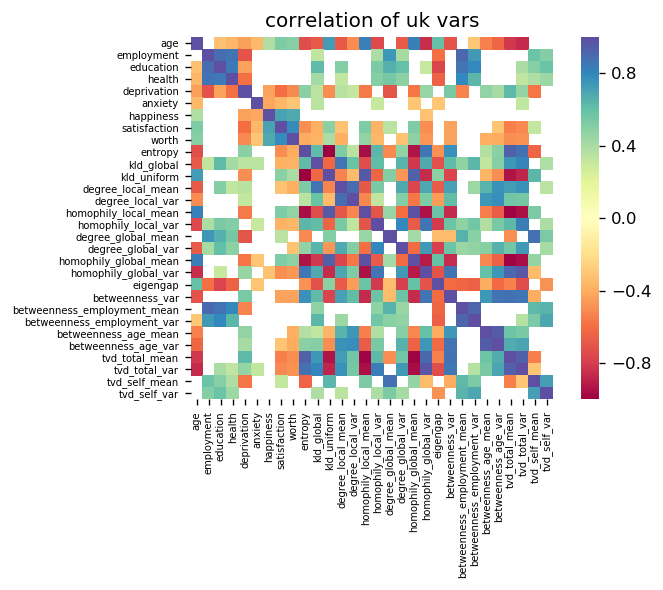

In [49]:
plot_matrix(corrs['coeff'], corrs['pvalue']>=1e-6, center=0, title='correlation of uk vars', ignore=[':'], save='figs/')

In [30]:
def analyze(model, verbose=True, short=False):
    import pandas as pd
    coef = model.params
    errs = model.bse
    del coef['Intercept']
    del errs['Intercept']
    norm = coef.abs().sum()
    coef /= norm
    errs /= norm
    coef = pd.concat([coef, errs], axis=1)
    coef.columns = ['coef', 'serr']
    if verbose:
        print('R2: %.2f, condition number: %.2f'%(model.rsquared, model.condition_number))
        print('==============================')
        print(coef)
        print('==============================')
    if short is not None:
        if short:
            fig = plt.figure(figsize=(12, 8))
            sm.graphics.plot_partregress_grid(model, fig=fig, exog_idx=[i for i in range(1, len(coef)+1)])
            plt.show()
        else:
            for key in coef.index:
                fig = plt.figure(figsize=(12,8))
                sm.graphics.plot_regress_exog(model, key, fig=fig)
                plt.show()
    return {'coef':coef, 'r2':model.rsquared, 'cond':model.condition_number}

In [84]:
def models(df, y, x, n=float('inf'), verbose=False, short=None, plot=True, single=True, save='', fmt='.pdf'):
    from itertools import combinations as combi
    if isinstance(y, str): y = [y]
    if isinstance(x, str): x = [x]
    models = dict()
    coeffs = dict()
    for tgt in y:
        models[tgt] = []
        coeffs[tgt] = {i: [] for i in x}
        for i in range(1, min(len(x),n)+1):
            models[tgt].append(dict())
            srcs = [' + '.join(src) for src in combi(x, i)]
            for src in srcs:
                model_name = tgt + ' ~ ' + src
                model = ols(model_name, data=df).fit()
                if verbose: print('MODEL:', model_name)
                tmp = analyze(model, verbose=verbose, short=short)
                models[tgt][i-1][src] = tmp
                for j in tmp['coef'].index: coeffs[tgt][j].append((i, tmp['coef']['coef'][j], tmp['coef']['serr'][j], tmp['r2']))
                if verbose: print('\n')
        if plot:
            if single:
                plt.figure(dpi=120)
                x_max = 0
                for key in coeffs[tgt]:
                    x_toplot = [i[0] for i in coeffs[tgt][key]]
                    x_errs = [i[-1]/2 for i in coeffs[tgt][key]]
                    y_toplot = [i[1] for i in coeffs[tgt][key]]
                    y_errs = [i[2] for i in coeffs[tgt][key]]
                    x_max = max(x_max, max(x_toplot))
                    plt.errorbar(x_toplot, y_toplot, xerr=x_errs, yerr=y_errs, label=key, fmt='o')
                plt.legend(bbox_to_anchor=(1.02,1.0), loc='upper left')
                plt.title(tgt)
                plt.xlabel('number of predictors (bar: $R^2$)')
                plt.ylabel('normalized coefficient (bar: $\sigma_\\beta$)')
                for i in range(x_max):
                    plt.gca().axhline(1/(i+1), ls=':', c='black', alpha=1/(i+1))
                    plt.gca().axhline(-1/(i+1), ls=':', c='black', alpha=1/(i+1))
                    plt.gca().axvline(i+0.5, ls='-', c='gray', alpha=0.2)            
                plt.gca().axhline(0, ls='-', c='gray', alpha=0.2)
                plt.gca().axvline(x_max+0.5, ls='-', c='gray', alpha=0.2)
                if save: plt.savefig(save+'/ols-'+tgt+'-vs-'+'-'.join(coeffs[tgt].keys())+fmt, bbox_inches='tight')
                plt.show()
            else:
                for key in coeffs[tgt]:
                    x_toplot = [i[0] for i in coeffs[tgt][key]]
                    x_errs = [i[-1]/2 for i in coeffs[tgt][key]]
                    y_toplot = [i[1] for i in coeffs[tgt][key]]
                    y_errs = [i[2] for i in coeffs[tgt][key]]
                    x_max = max(x_toplot)
                    plt.errorbar(x_toplot, y_toplot, xerr=x_errs, yerr=y_errs, label=key, fmt='o')
                    plt.title(tgt+'-vs-'+key)
                    plt.xlabel('number of predictors (bar: $R^2$)')
                    plt.ylabel('normalized coefficient (bar: $\sigma_\\beta$)')
                    for i in range(x_max):
                        plt.gca().axhline(1/(i+1), ls=':', c='black', alpha=1/(i+1))
                        plt.gca().axhline(-1/(i+1), ls=':', c='black', alpha=1/(i+1))
                        plt.gca().axvline(i+0.5, ls='-', c='gray', alpha=0.2)            
                    plt.gca().axhline(0, ls='-', c='gray', alpha=0.2)
                    plt.gca().axvline(x_max+0.5, ls='-', c='gray', alpha=0.2)
                    if save: plt.savefig(save+'/ols-'+tgt+'-vs-'+key+'-given-'+'-'.join(coeffs[tgt].keys()-key)+fmt, bbox_inches='tight')
                    plt.show()
    return models

In [68]:
metric_oi = ['entropy', 'kld_uniform', 'kld_global', 'degree_local_mean', 'degree_local_var',
             'homophily_local_mean', 'homophily_local_var', 'degree_global_mean', 'degree_global_var',
             'homophily_global_mean', 'homophily_global_var', 'eigengap', 'betweenness_var',
             'betweenness_employment_mean', 'betweenness_employment_var', 'betweenness_age_mean', 'betweenness_age_var',
             'tvd_total_mean', 'tvd_total_var', 'tvd_self_mean', 'tvd_self_var']

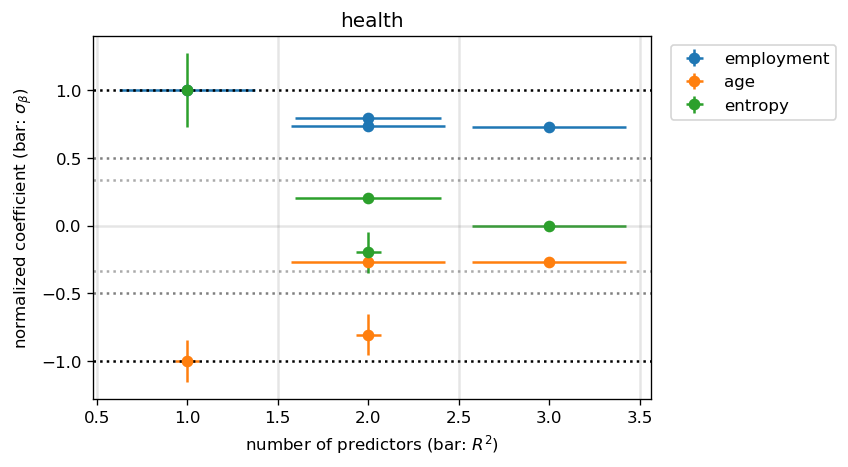

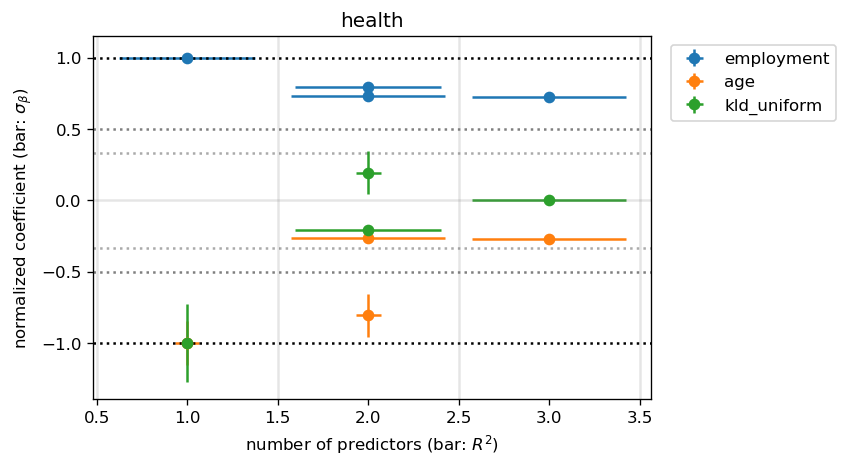

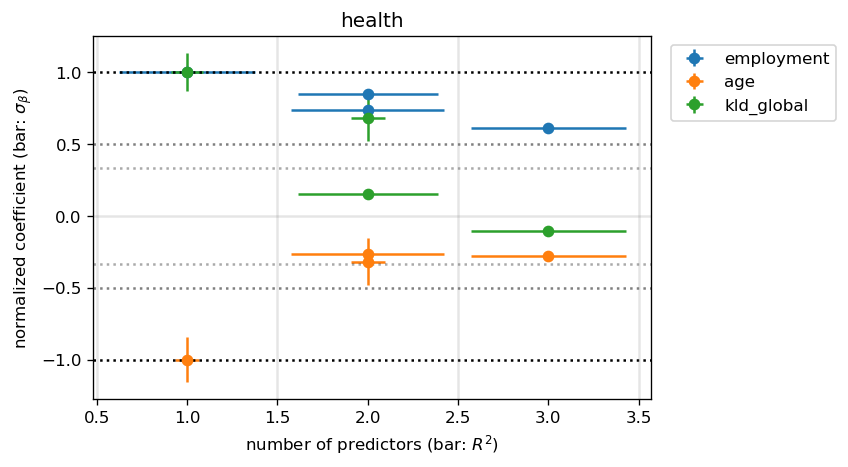

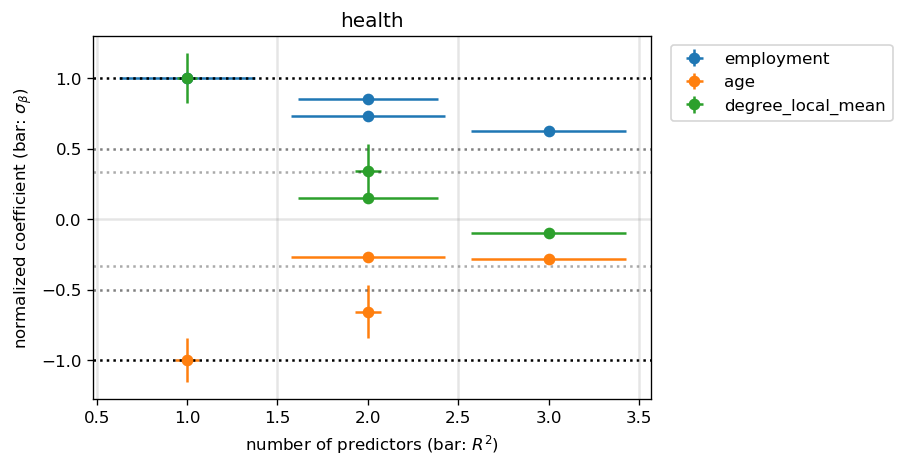

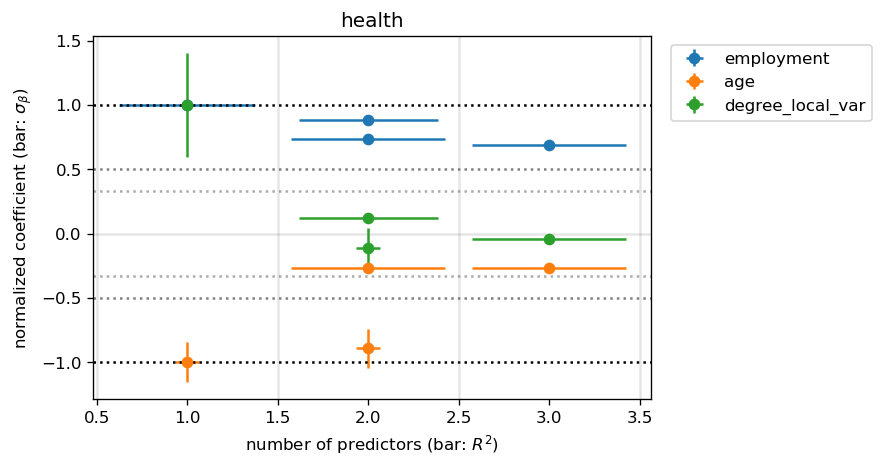

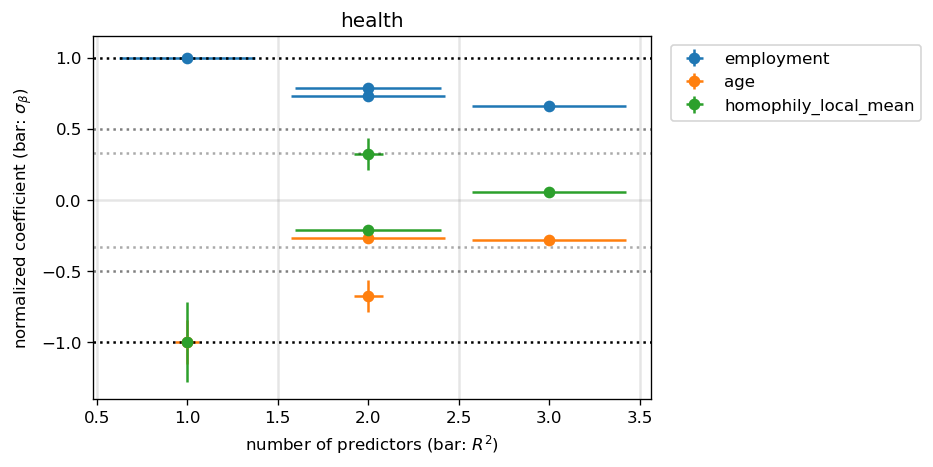

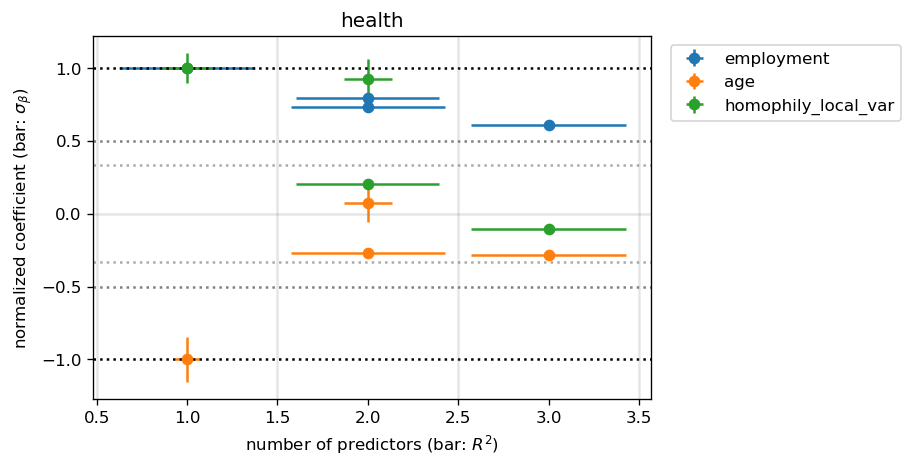

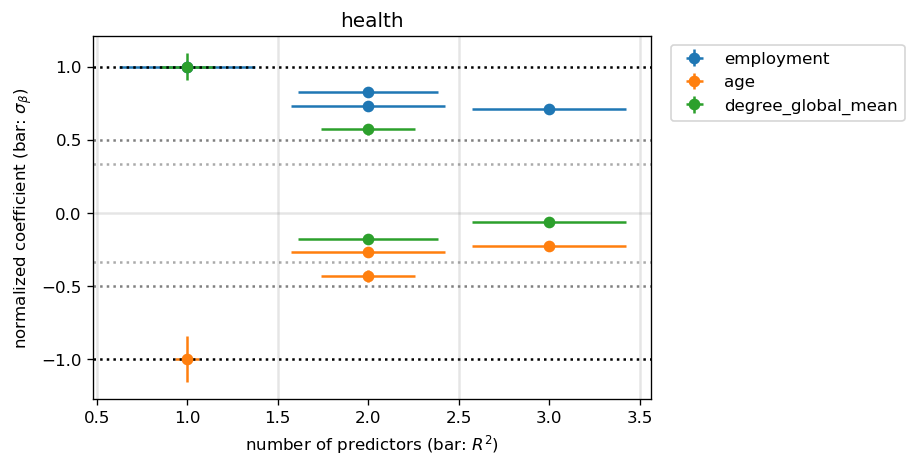

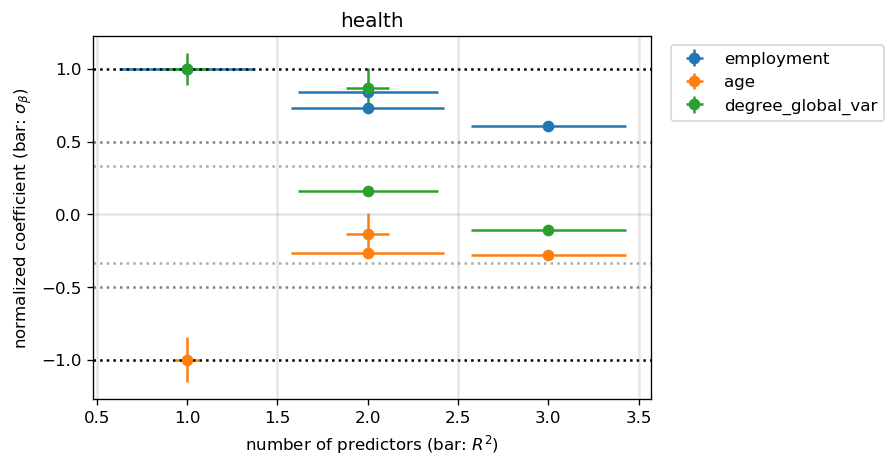

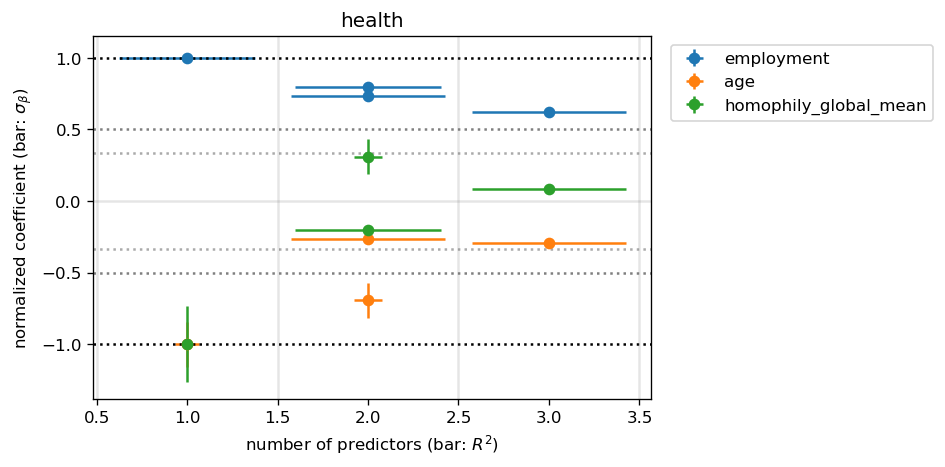

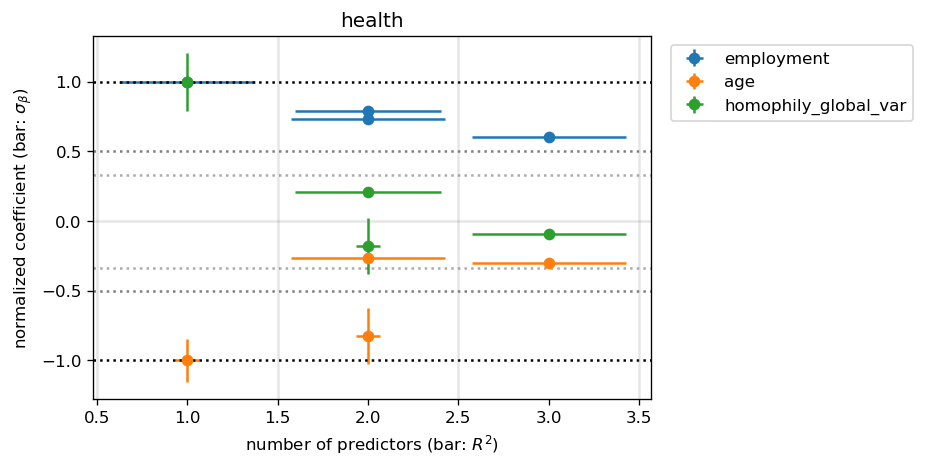

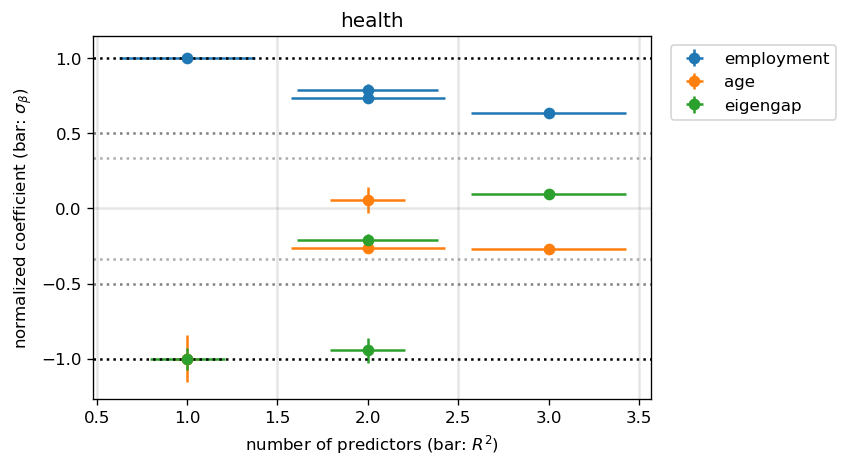

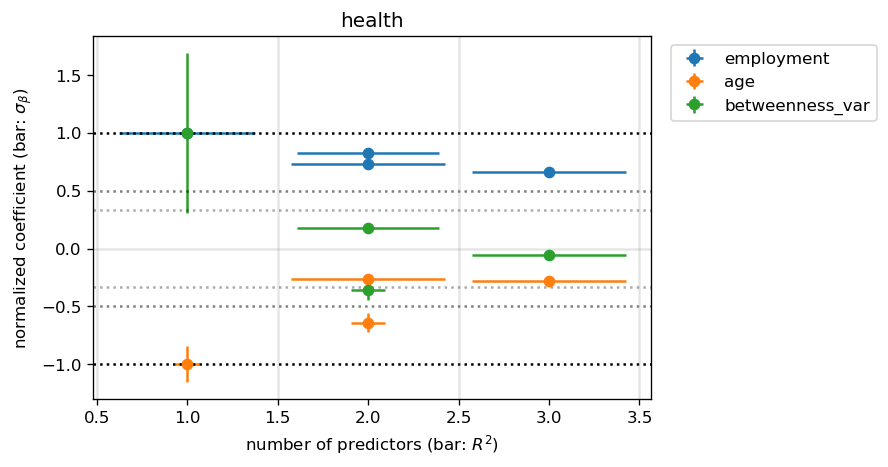

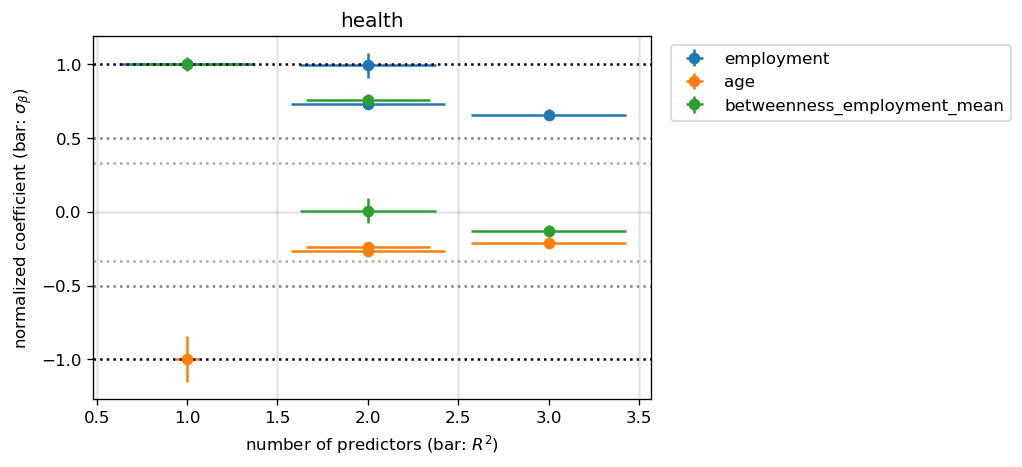

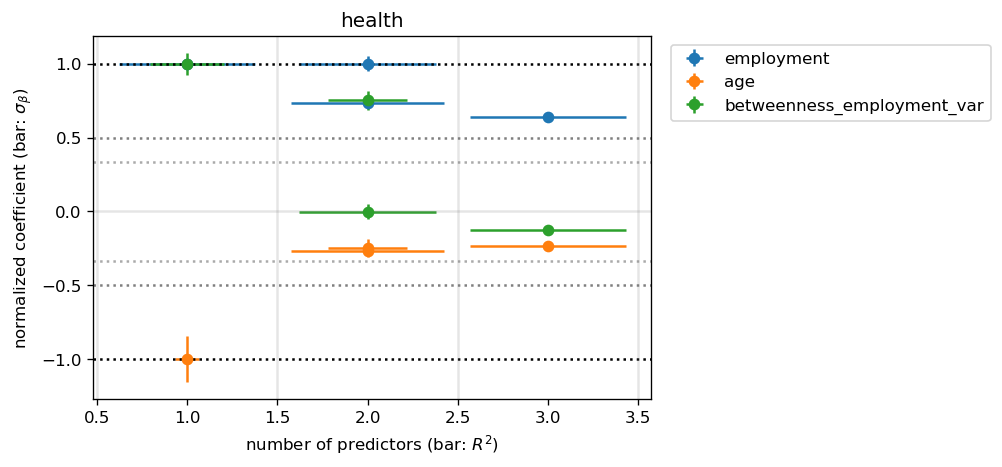

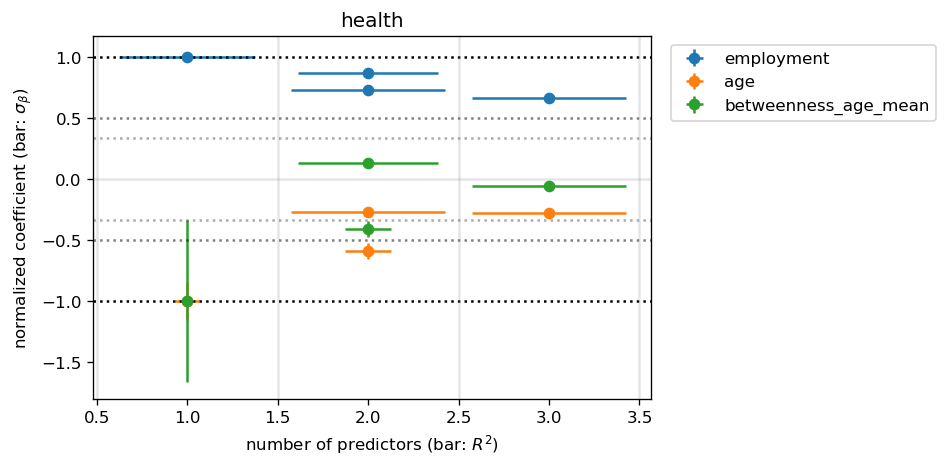

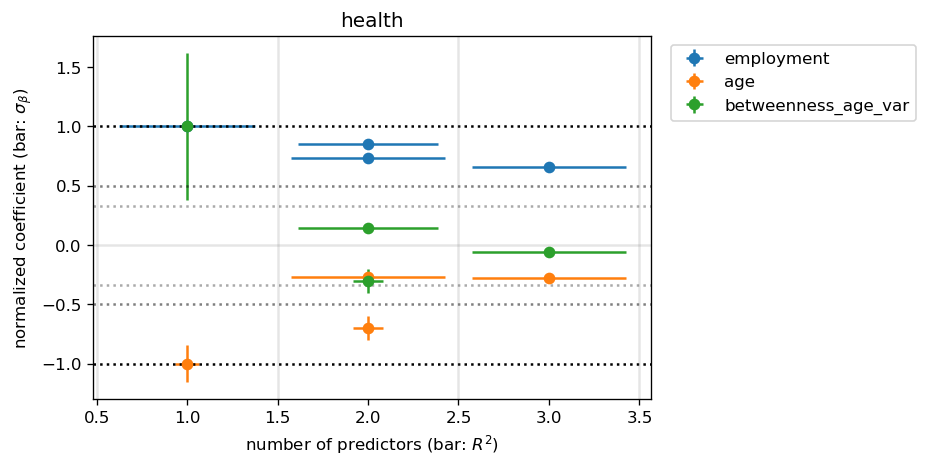

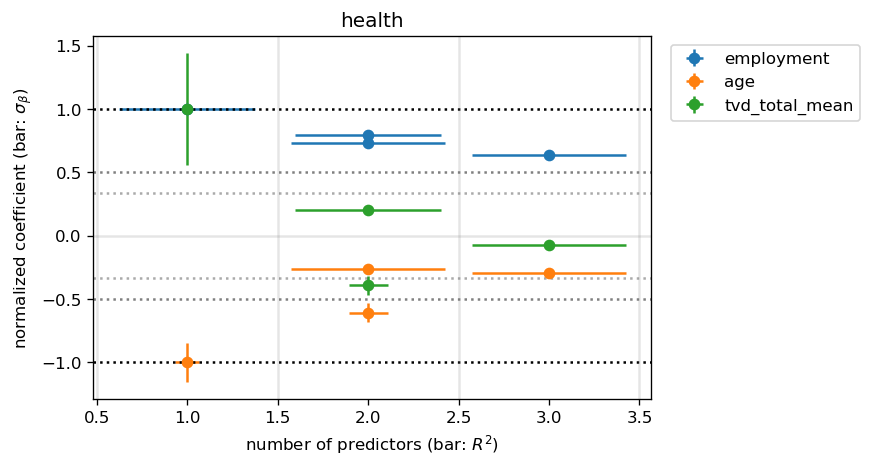

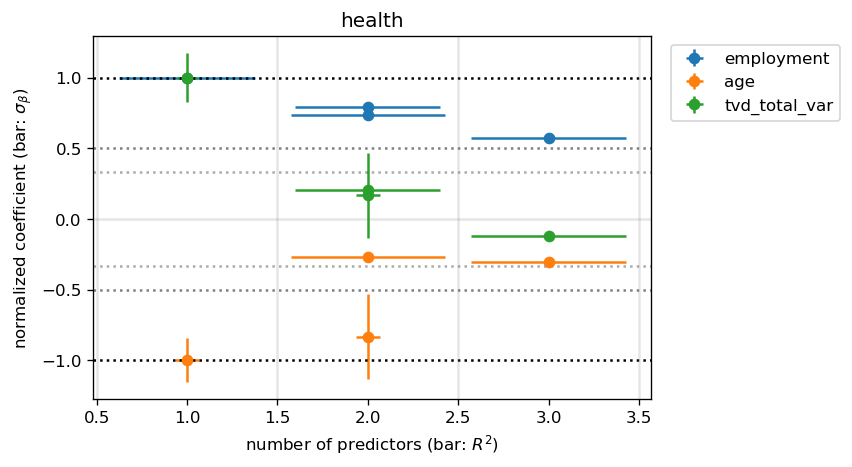

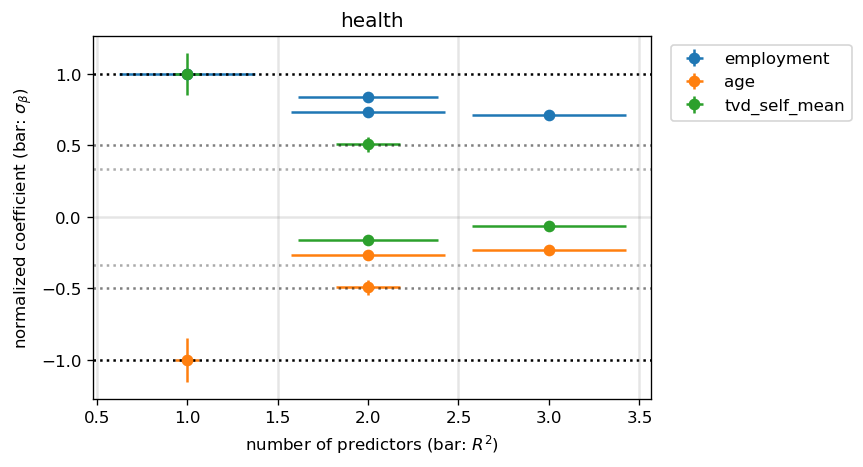

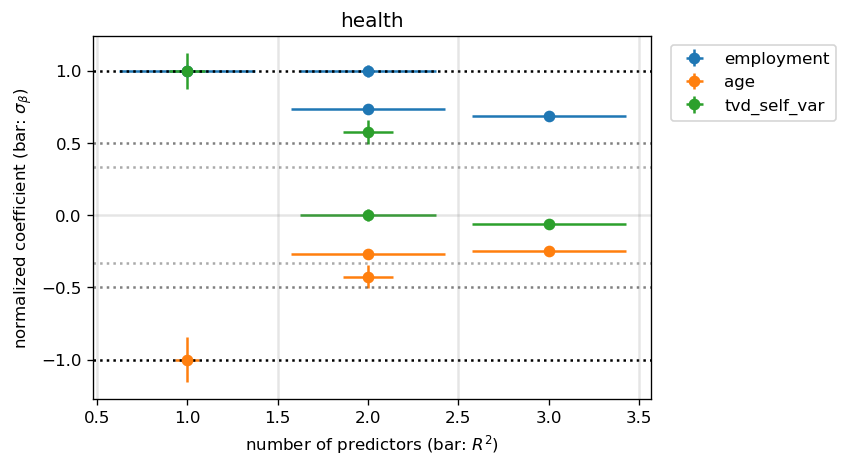

In [69]:
for metric in metric_oi: models_health = models(data, 'health', ['employment', 'age', metric], save='figs/')

In [74]:
metric_oi = ['entropy', 'homophily_local_var', 'degree_global_mean', 'eigengap', 'betweenness_var',
             'betweenness_employment_mean', 'betweenness_age_mean', 'tvd_total_mean']

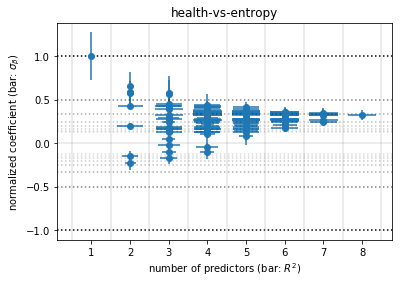

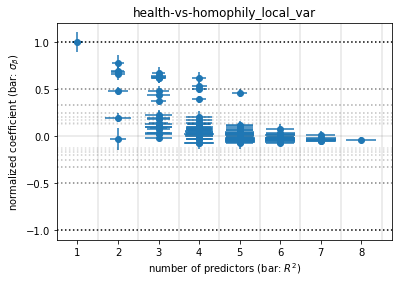

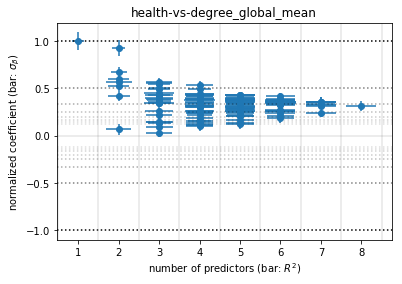

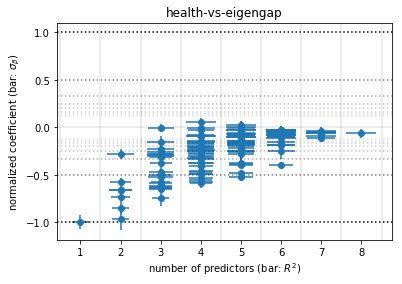

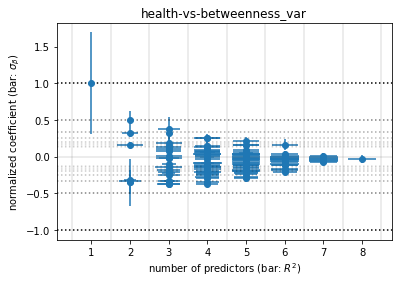

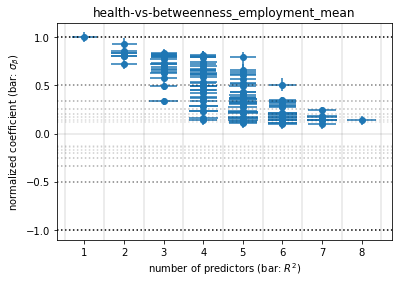

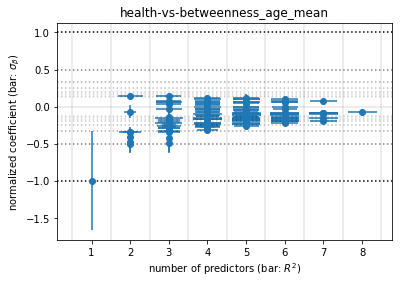

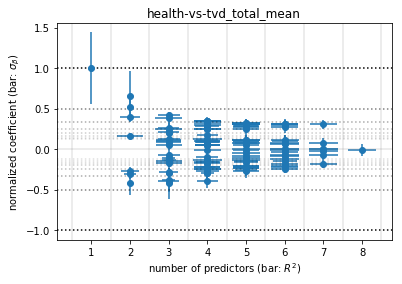

In [85]:
models_health = models(data, 'health', metric_oi, save='figs/', single=False)

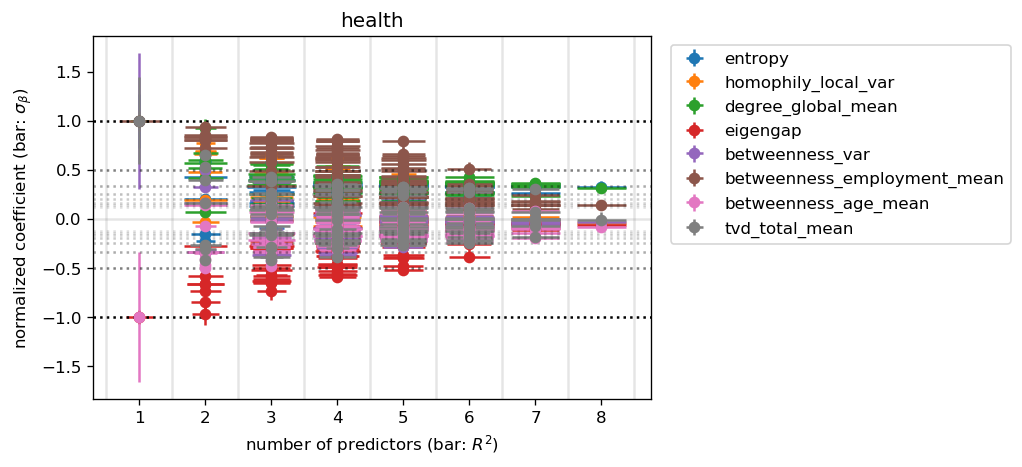

In [86]:
models_health = models(data, 'health', metric_oi, save='figs/')

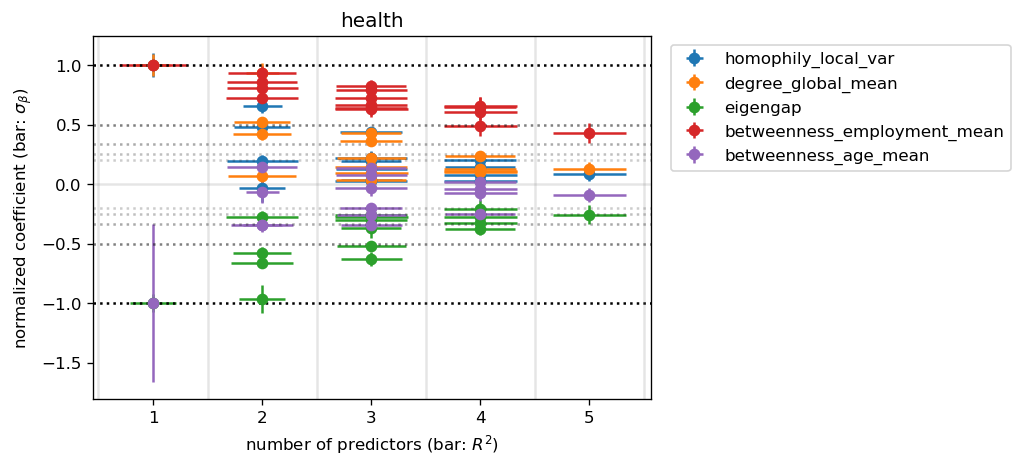

In [87]:
metric_oi = ['homophily_local_var', 'degree_global_mean', 'eigengap', 'betweenness_employment_mean', 'betweenness_age_mean']
models_health = models(data, 'health', metric_oi, save='figs/')

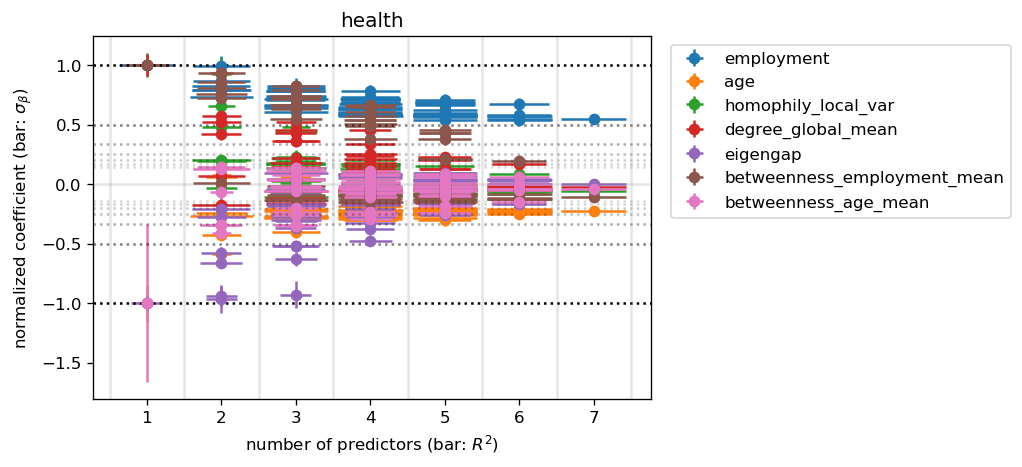

In [88]:
models_health = models(data, 'health', ['employment','age']+metric_oi, save='figs/')

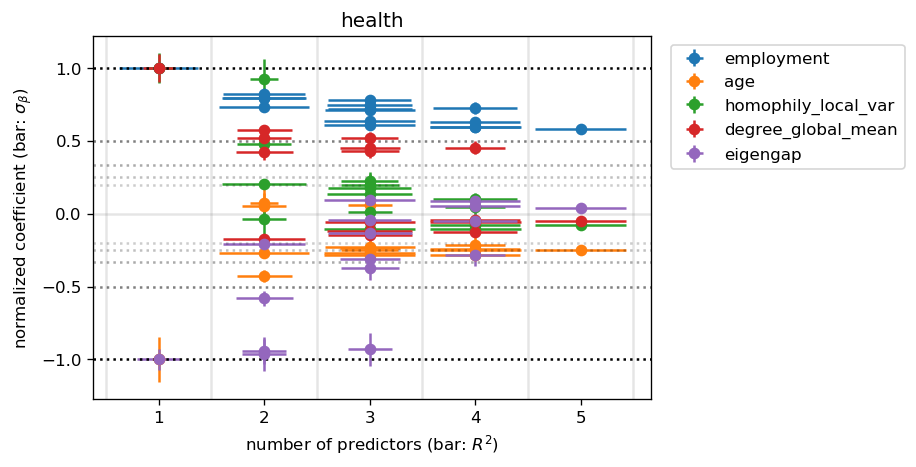

In [89]:
metric_oi = ['homophily_local_var', 'degree_global_mean', 'eigengap']
models_health = models(data, 'health', ['employment','age']+metric_oi, save='figs/')

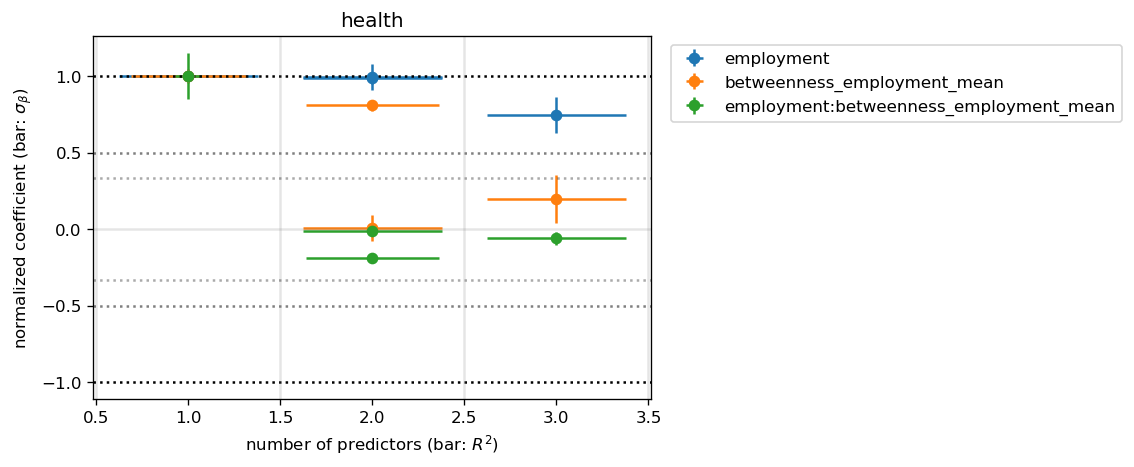

In [35]:
models_emp_health = models(data, 'health', ['employment', 'betweenness_employment_mean', 'employment:betweenness_employment_mean'])

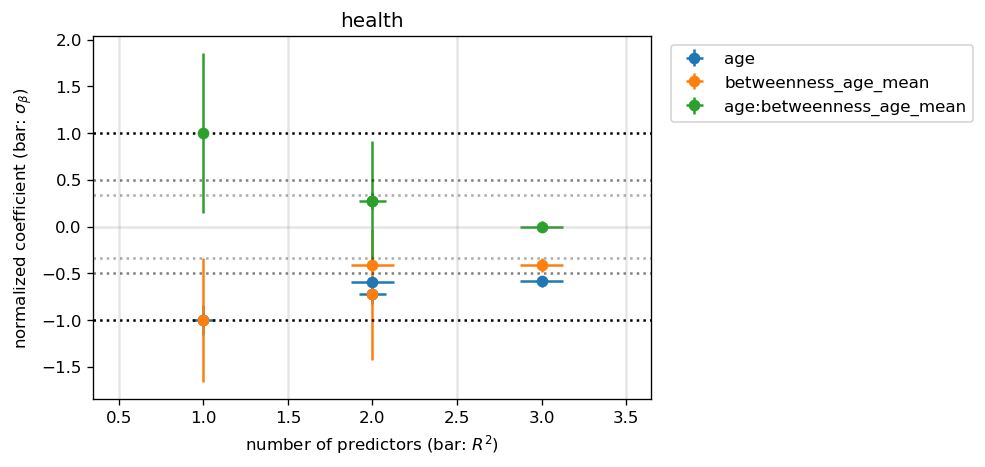

In [36]:
models_age_health = models(data, 'health', ['age', 'betweenness_age_mean', 'age:betweenness_age_mean'])

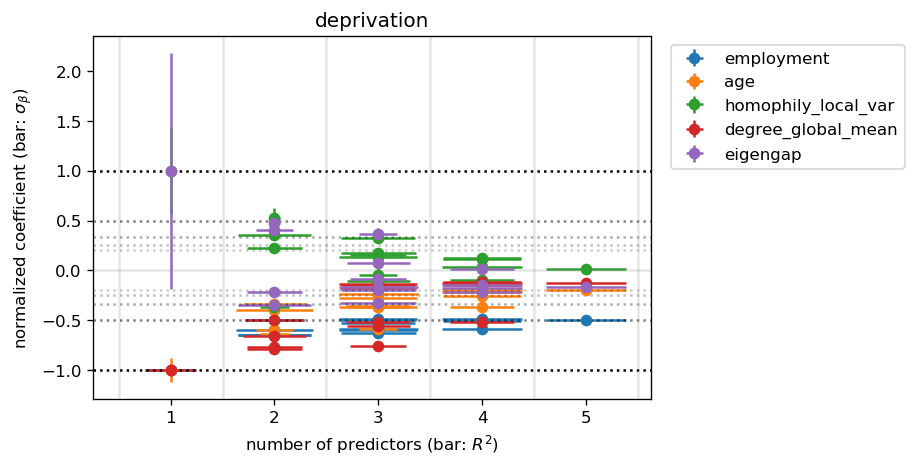

In [96]:
models_deprivation = models(data, 'deprivation', ['employment','age']+metric_oi, save='figs/')

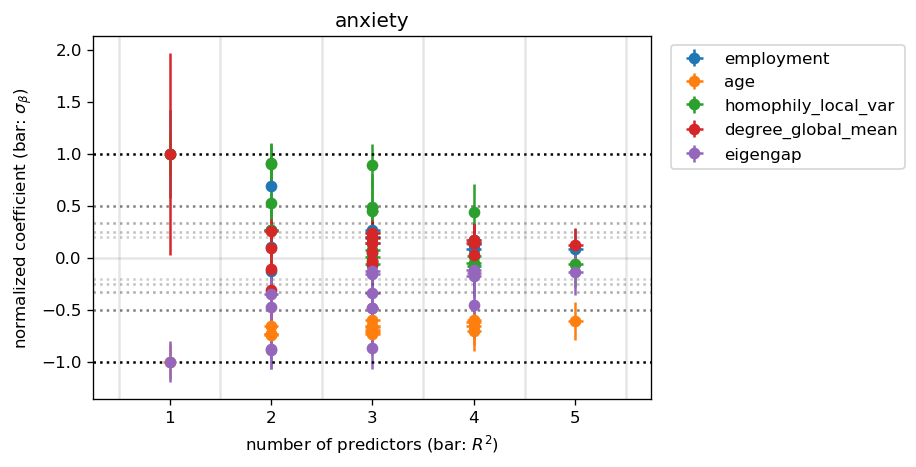

In [97]:
models_anxiety = models(data, 'anxiety', ['employment','age']+metric_oi, save='figs/')

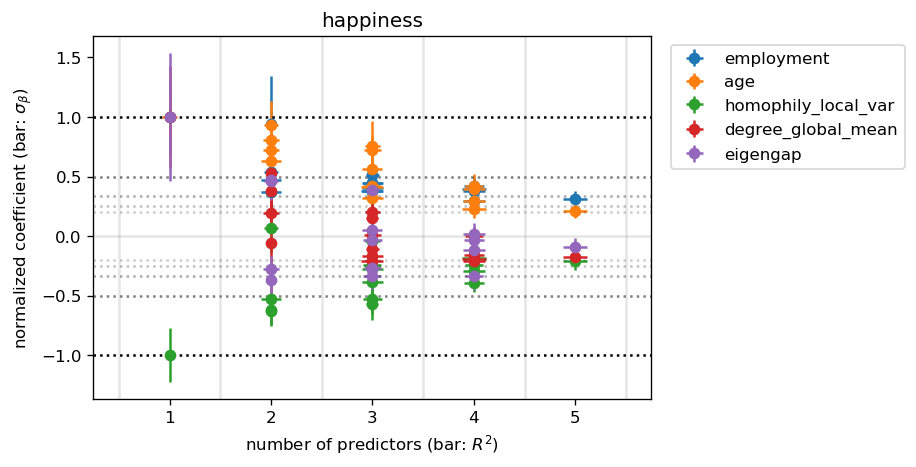

In [98]:
models_happiness = models(data, 'happiness', ['employment','age']+metric_oi, save='figs/')

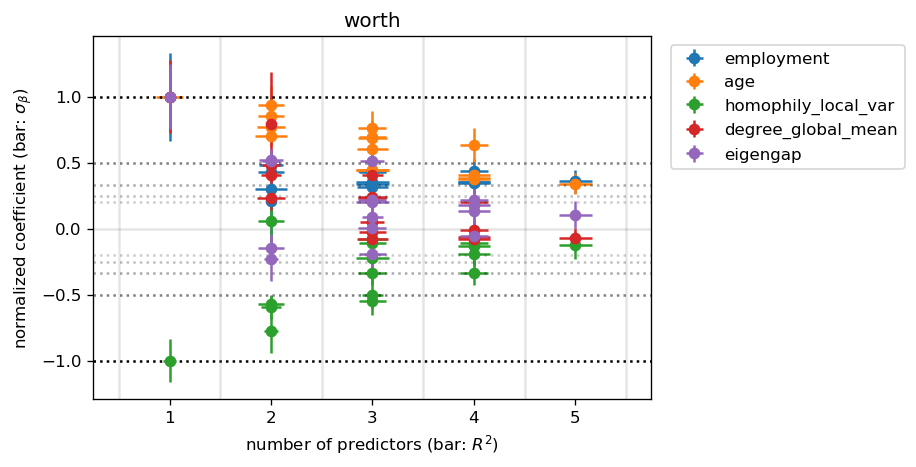

In [99]:
models_worth = models(data, 'worth', ['employment','age']+metric_oi, save='figs/')

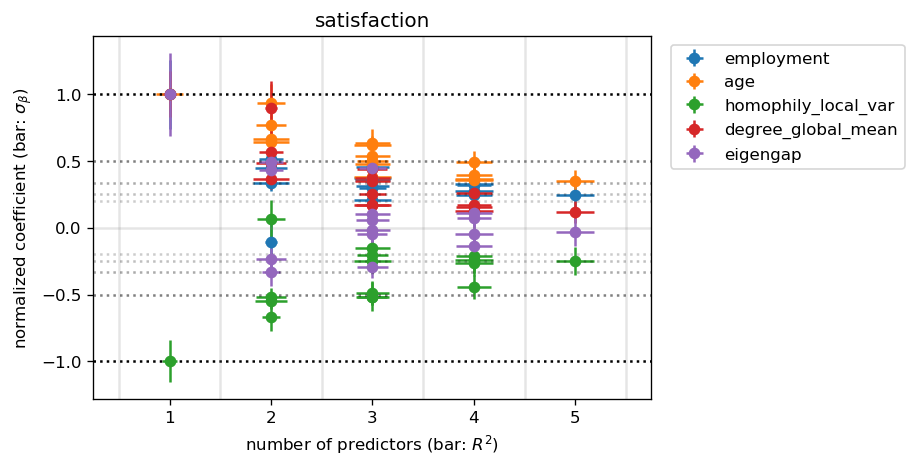

In [100]:
models_satisfaction = models(data, 'satisfaction', ['employment','age']+metric_oi, save='figs/')

R2: 0.76, condition number: 4.61
                                 coef      serr
employment                   0.992868  0.084895
betweenness_employment_mean  0.007132  0.084895


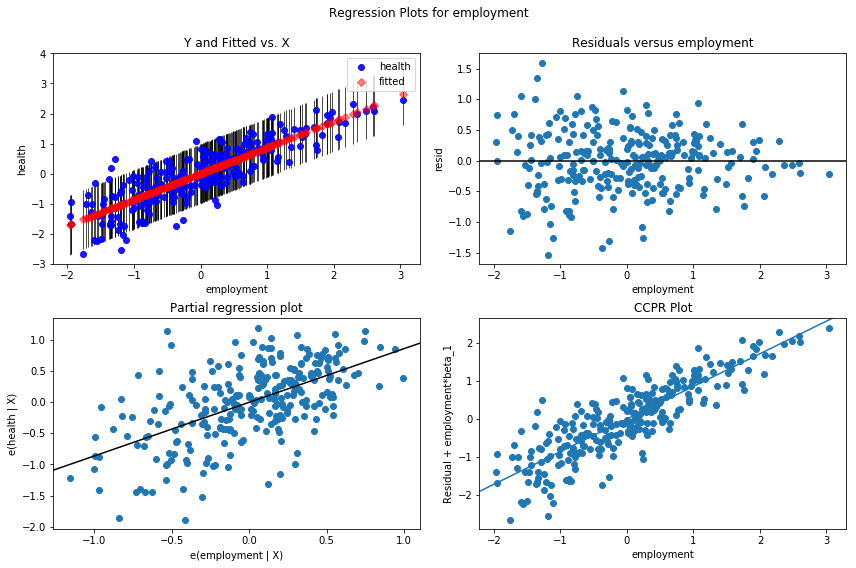

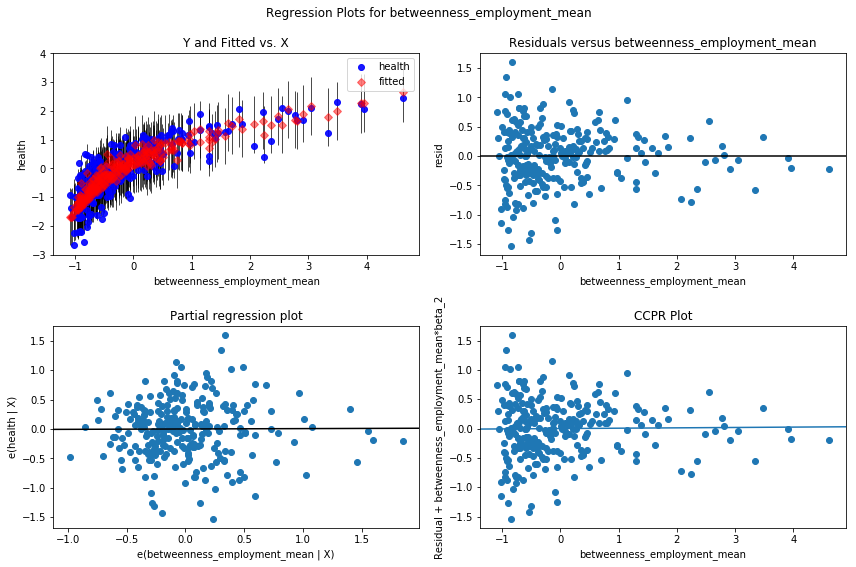

In [90]:
model_emp = ols('health ~ employment + betweenness_employment_mean', data=data).fit()
res = analyze(model_emp)

R2: 0.25, condition number: 1.82
                          coef      serr
age                  -0.590404  0.064019
betweenness_age_mean -0.409596  0.064019


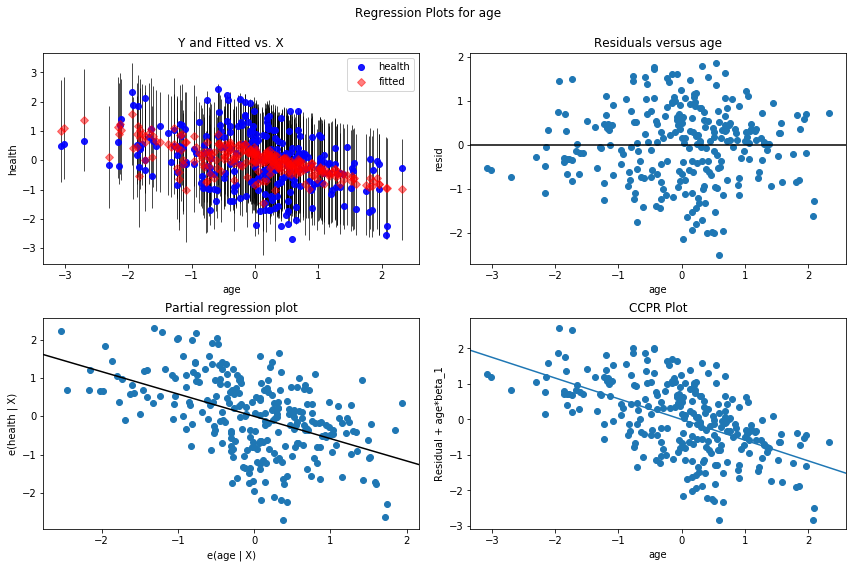

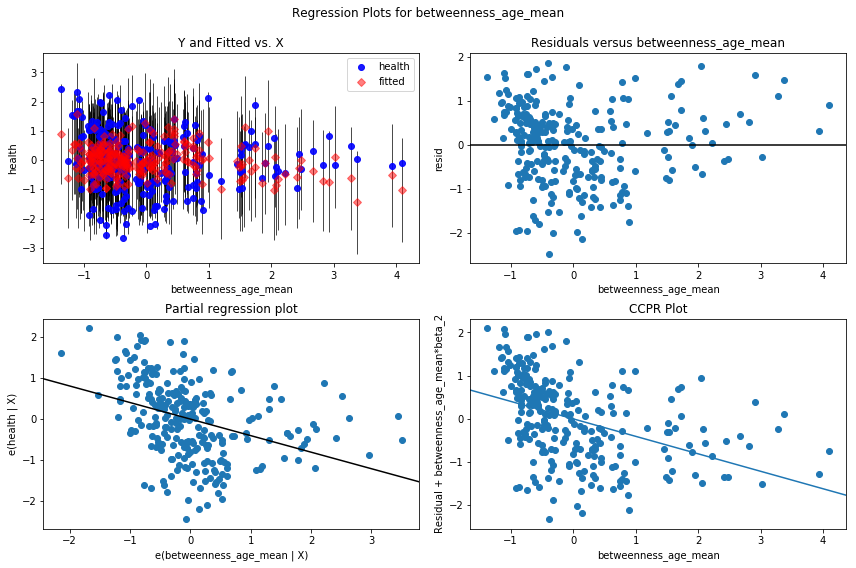

In [91]:
model_age = ols('health ~ age + betweenness_age_mean', data=data).fit()
res = analyze(model_age)

R2: 0.85, condition number: 1.07
                coef      serr
employment  0.733735  0.020825
age        -0.266265  0.020825


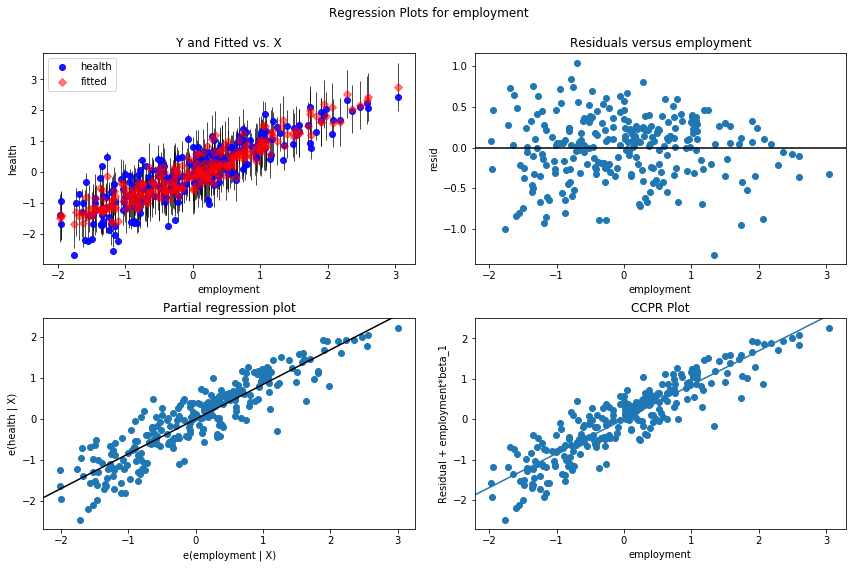

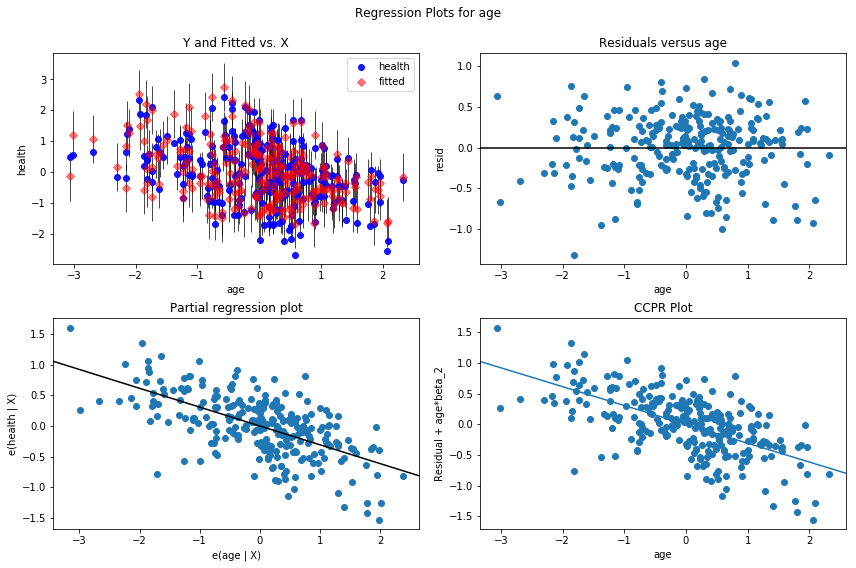

In [92]:
model_emp_age = ols('health ~ employment + age', data=data).fit()
res = analyze(model_emp_age)

R2: 0.7806420513770435
condition number: 1.977897260578417
normalized model coefficients:
                coef      serr
employment  0.790932  0.037829
eigengap   -0.209068  0.037829


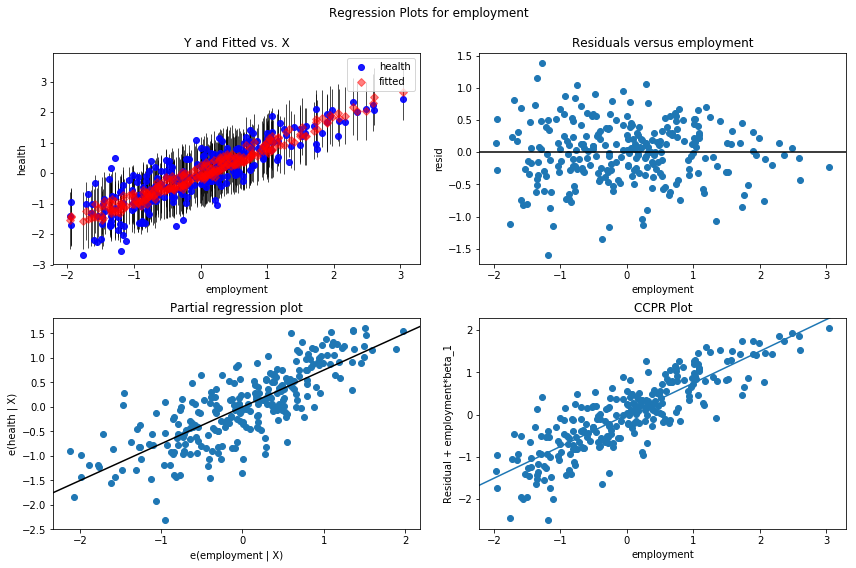

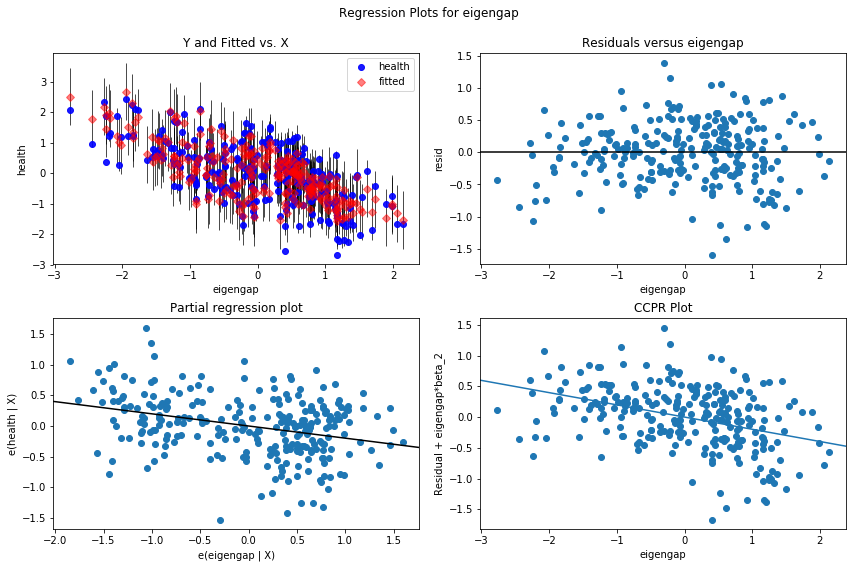

In [451]:
model_emp_eig = ols('health ~ employment + age + eigengap', data=data).fit()
res = analyze(model_emp_eig)

R2: 0.41563632227857106
condition number: 2.026843218288326
normalized model coefficients:
              coef      serr
age       0.056068  0.084084
eigengap -0.943932  0.084084


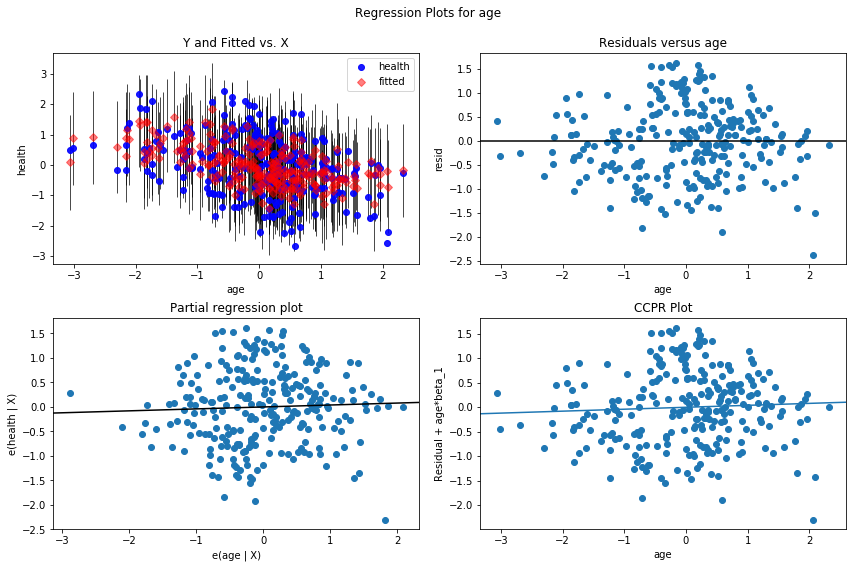

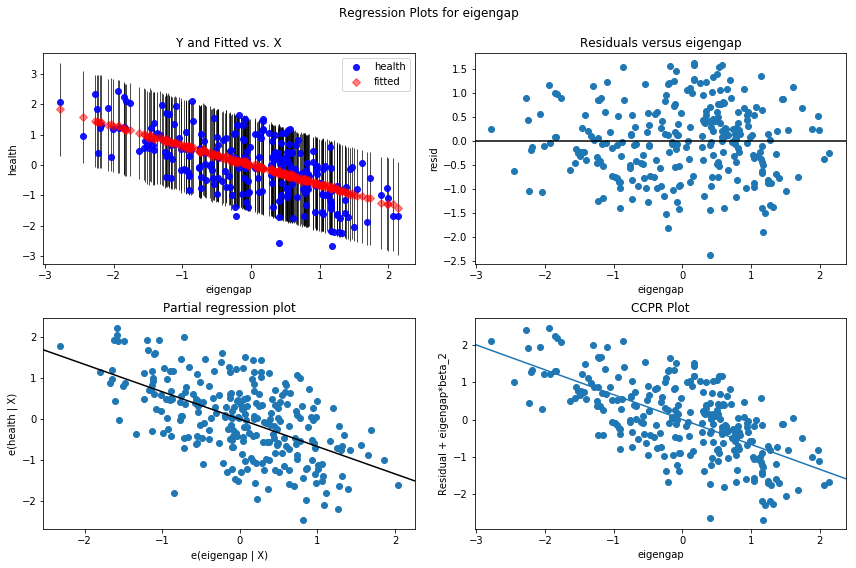

In [452]:
model_age_eig = ols('health ~ age + eigengap', data=data).fit()
res = analyze(model_age_eig)

R2: 0.86, condition number: 3.19
                coef      serr
employment  0.636867  0.022588
age        -0.266705  0.022922
eigengap    0.096428  0.028394


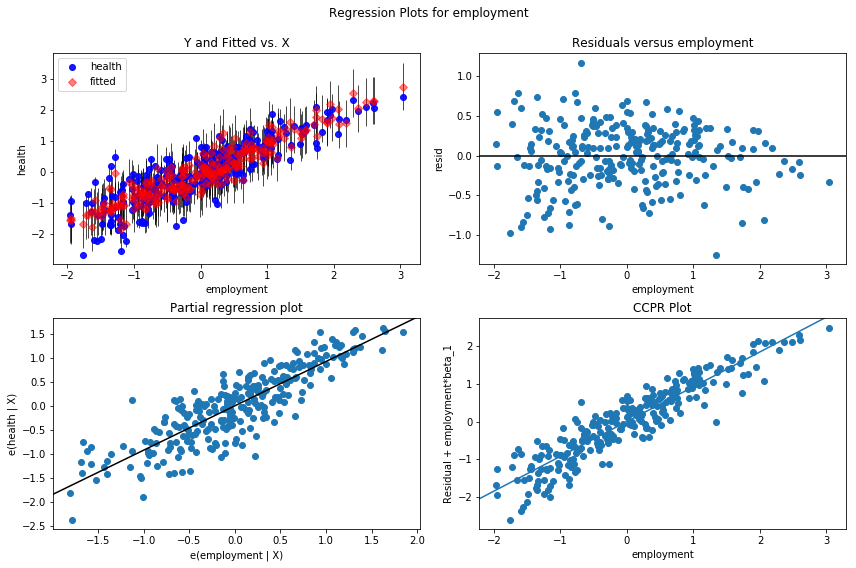

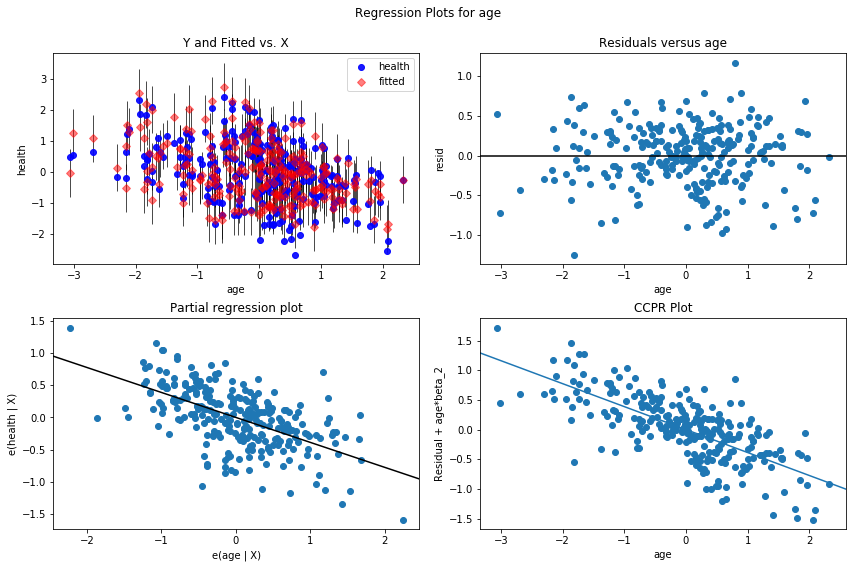

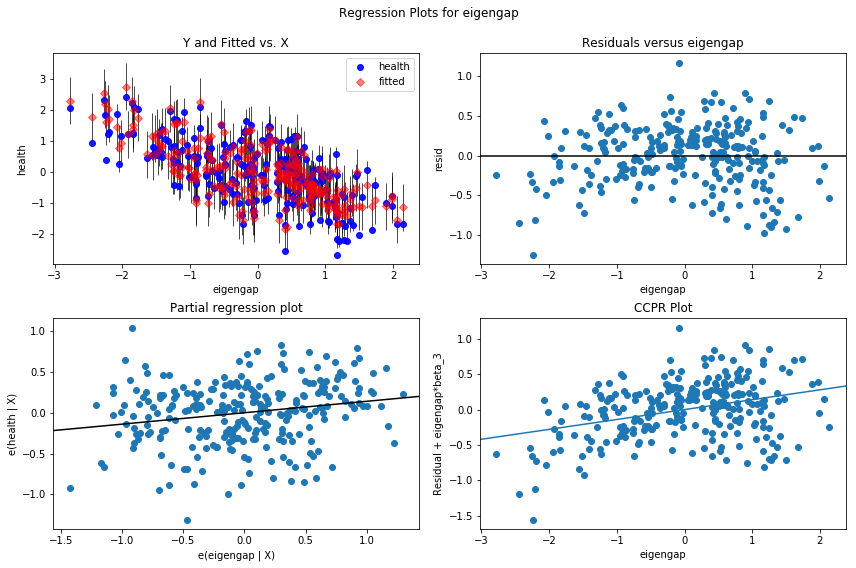

In [93]:
model_emp_age_eig = ols('health ~ employment + age + eigengap', data=data).fit()
res = analyze(model_emp_age_eig)

R2: 0.85, condition number: 2.84
                        coef      serr
employment          0.711679  0.029502
age                -0.228379  0.019931
degree_global_mean -0.059942  0.029859


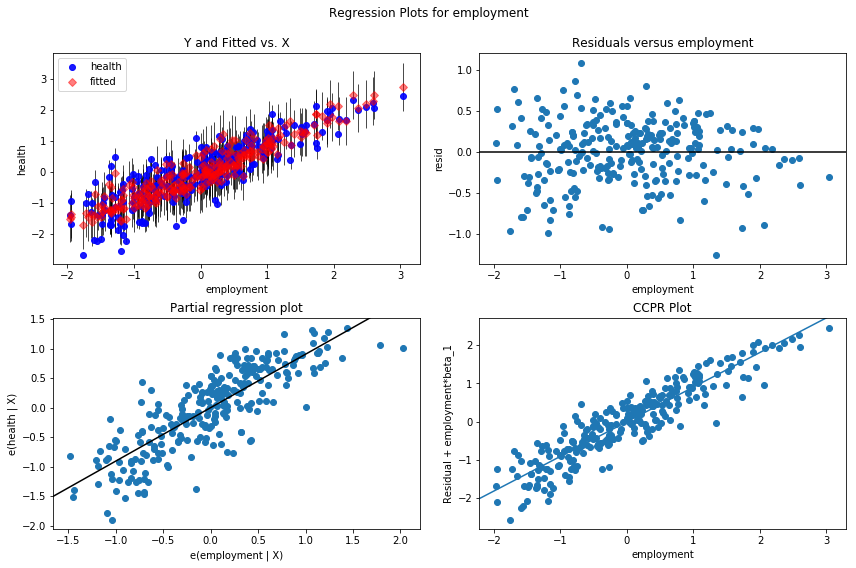

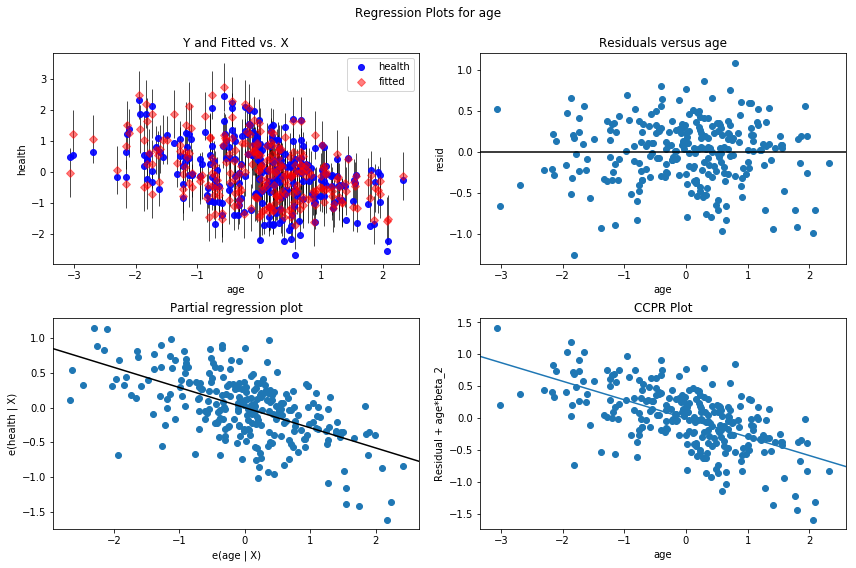

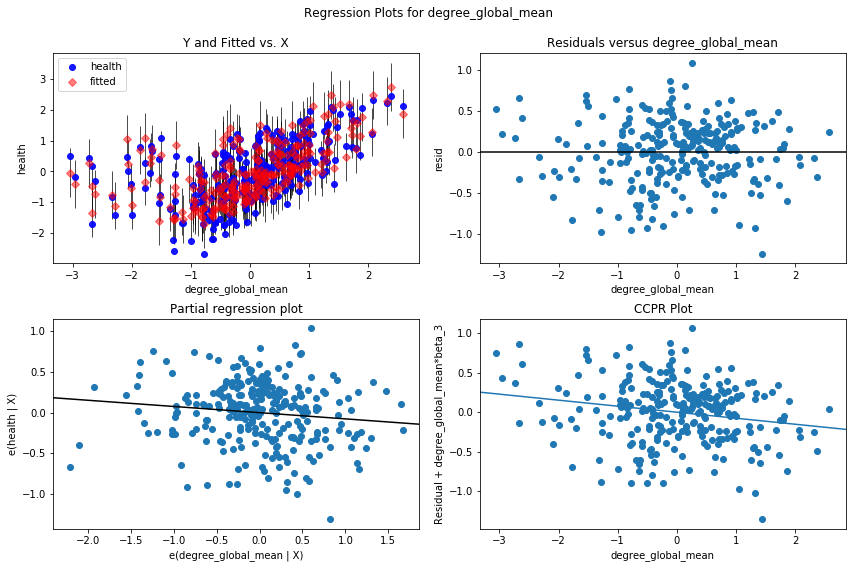

In [94]:
model_emp_age_deg = ols('health ~ employment + age + degree_global_mean', data=data).fit()
res = analyze(model_emp_age_deg)

R2: 0.86, condition number: 3.25
                         coef      serr
employment           0.606633  0.018411
age                 -0.285495  0.025758
homophily_local_var -0.107872  0.027928


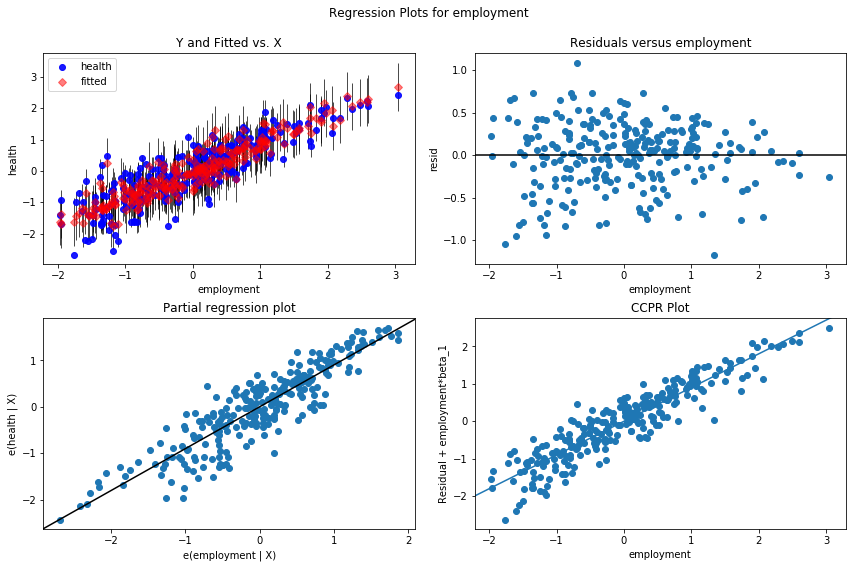

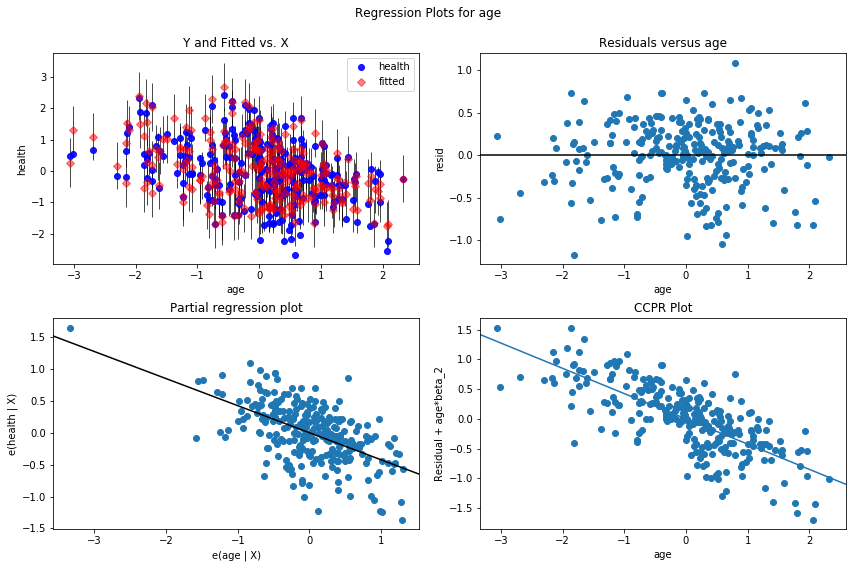

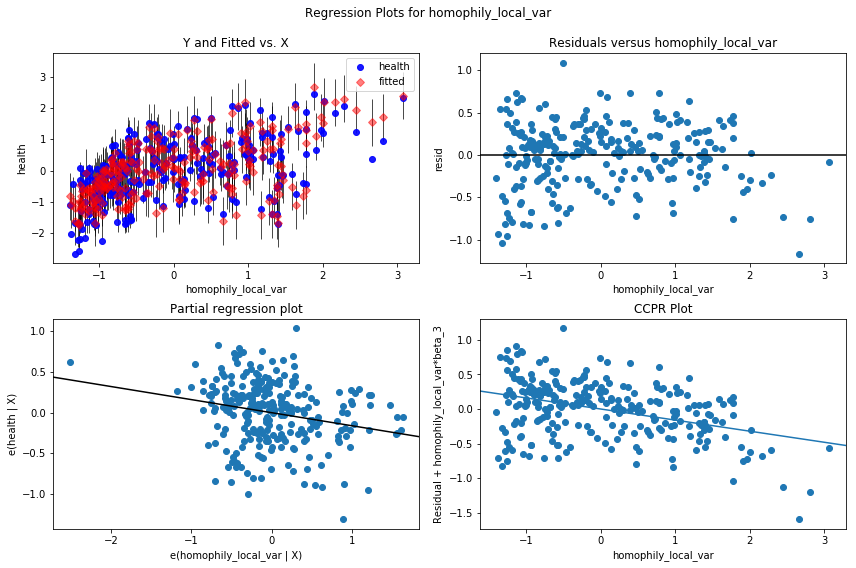

In [95]:
model_emp_age_sas = ols('health ~ employment + age + homophily_local_var', data=data).fit()
res = analyze(model_emp_age_sas)

R2: 0.7613827350233412
condition number: 3.1945835021179194
normalized model coefficients:
                coef      serr
employment -0.591665  0.028375
age        -0.236515  0.028795
eigengap   -0.171820  0.035669


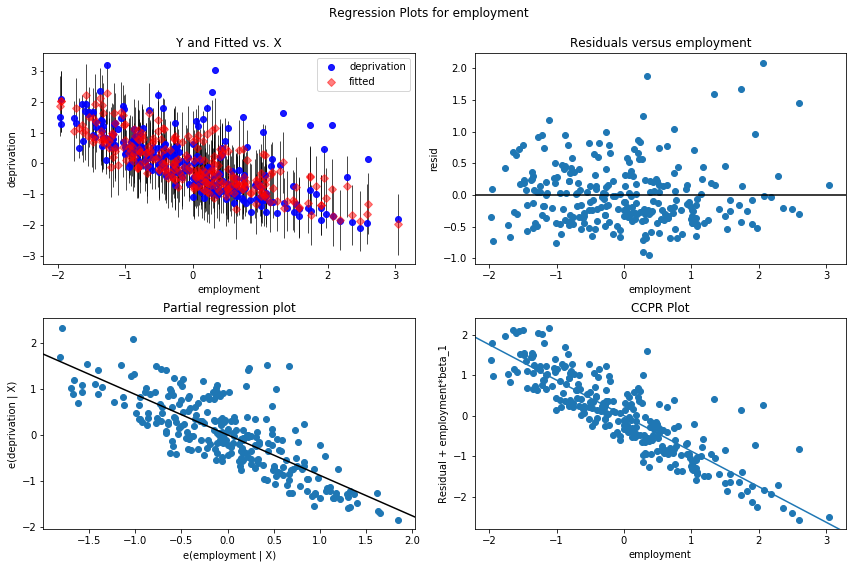

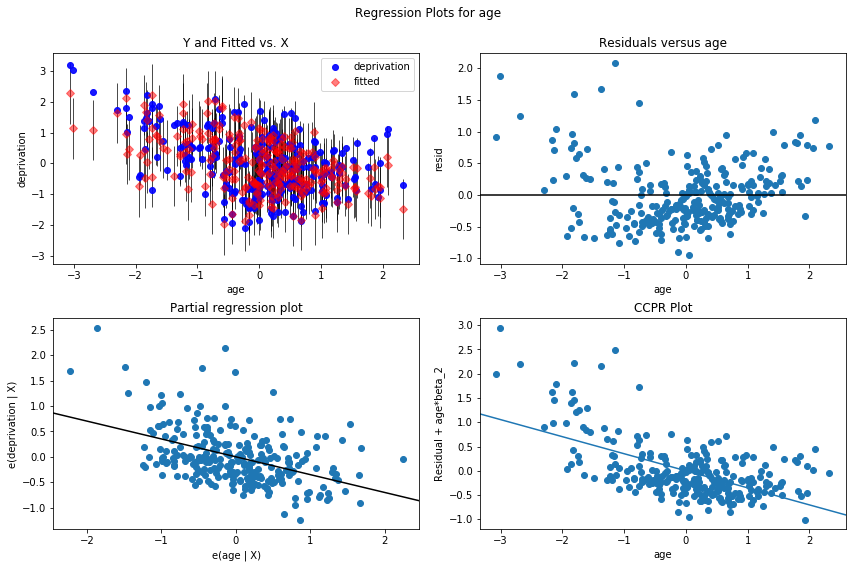

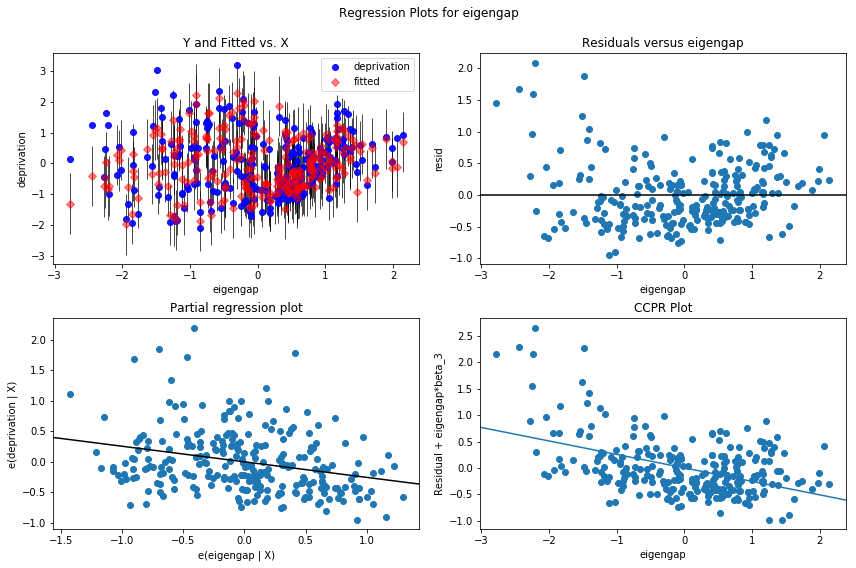

In [461]:
model_emp_age_eig = ols('deprivation ~ employment + age + eigengap', data=data).fit()
res = analyze(model_emp_age_eig)